In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

In [2]:
f = open('/Users/Raafe/Desktop/Wind.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[0],index_col=0)
f.close()
# data.index
# data = data.set_index(['Time'])

In [3]:
data=data.drop(data.columns[[2,3,4,5,6,7,8]],axis=1)

In [4]:
data1=data.resample('H').mean()

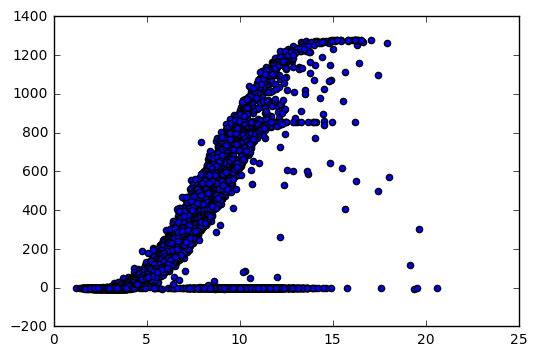

In [5]:
plt.scatter(data1['MH-Satara Wind Speed Average'],data1['MH-Active Power  Active Power Average'])

In [6]:
data1.isnull().sum().sum()

1040

In [7]:
data2=data1.interpolate()

In [8]:
data2.isnull().sum().sum()

0

In [9]:
data2

,MH-Satara Wind Speed Average,MH-Active Power Active Power Average
Local time,,
2015-01-01 00:00:00,4.900000,65.700000
2015-01-01 01:00:00,5.516667,112.566667
2015-01-01 02:00:00,5.333333,89.800000
2015-01-01 03:00:00,3.366667,17.833333
2015-01-01 04:00:00,3.100000,-1.316667
2015-01-01 05:00:00,3.566667,11.266667
2015-01-01 06:00:00,2.766667,0.000000
2015-01-01 07:00:00,2.150000,0.000000
2015-01-01 08:00:00,2.083333,0.000000


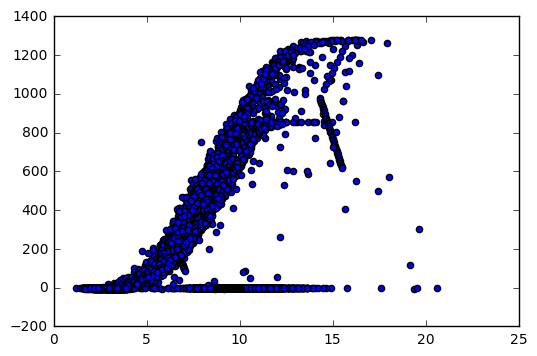

In [10]:
plt.scatter(data2['MH-Satara Wind Speed Average'],data2['MH-Active Power  Active Power Average'])

In [11]:
data2.rename(columns={'MH-Satara Wind Speed Average': 'Speed', 'MH-Active Power  Active Power Average': 'Power'},inplace=True)
df=data2

In [12]:
df['DayOfYear'] = df.index.dayofyear
df['Weekday'] = df.index.dayofweek
df['Hour'] = df.index.hour

In [13]:
loadCurves = df.groupby(['DayOfYear', 'Hour'])['Power'].mean().unstack()

In [14]:
loadCurves1=loadCurves.interpolate()

0         Axes(0.1,0.736957;0.363636x0.163043)
1    Axes(0.536364,0.736957;0.363636x0.163043)
2         Axes(0.1,0.541304;0.363636x0.163043)
3    Axes(0.536364,0.541304;0.363636x0.163043)
4         Axes(0.1,0.345652;0.363636x0.163043)
5    Axes(0.536364,0.345652;0.363636x0.163043)
6             Axes(0.1,0.15;0.363636x0.163043)
dtype: object

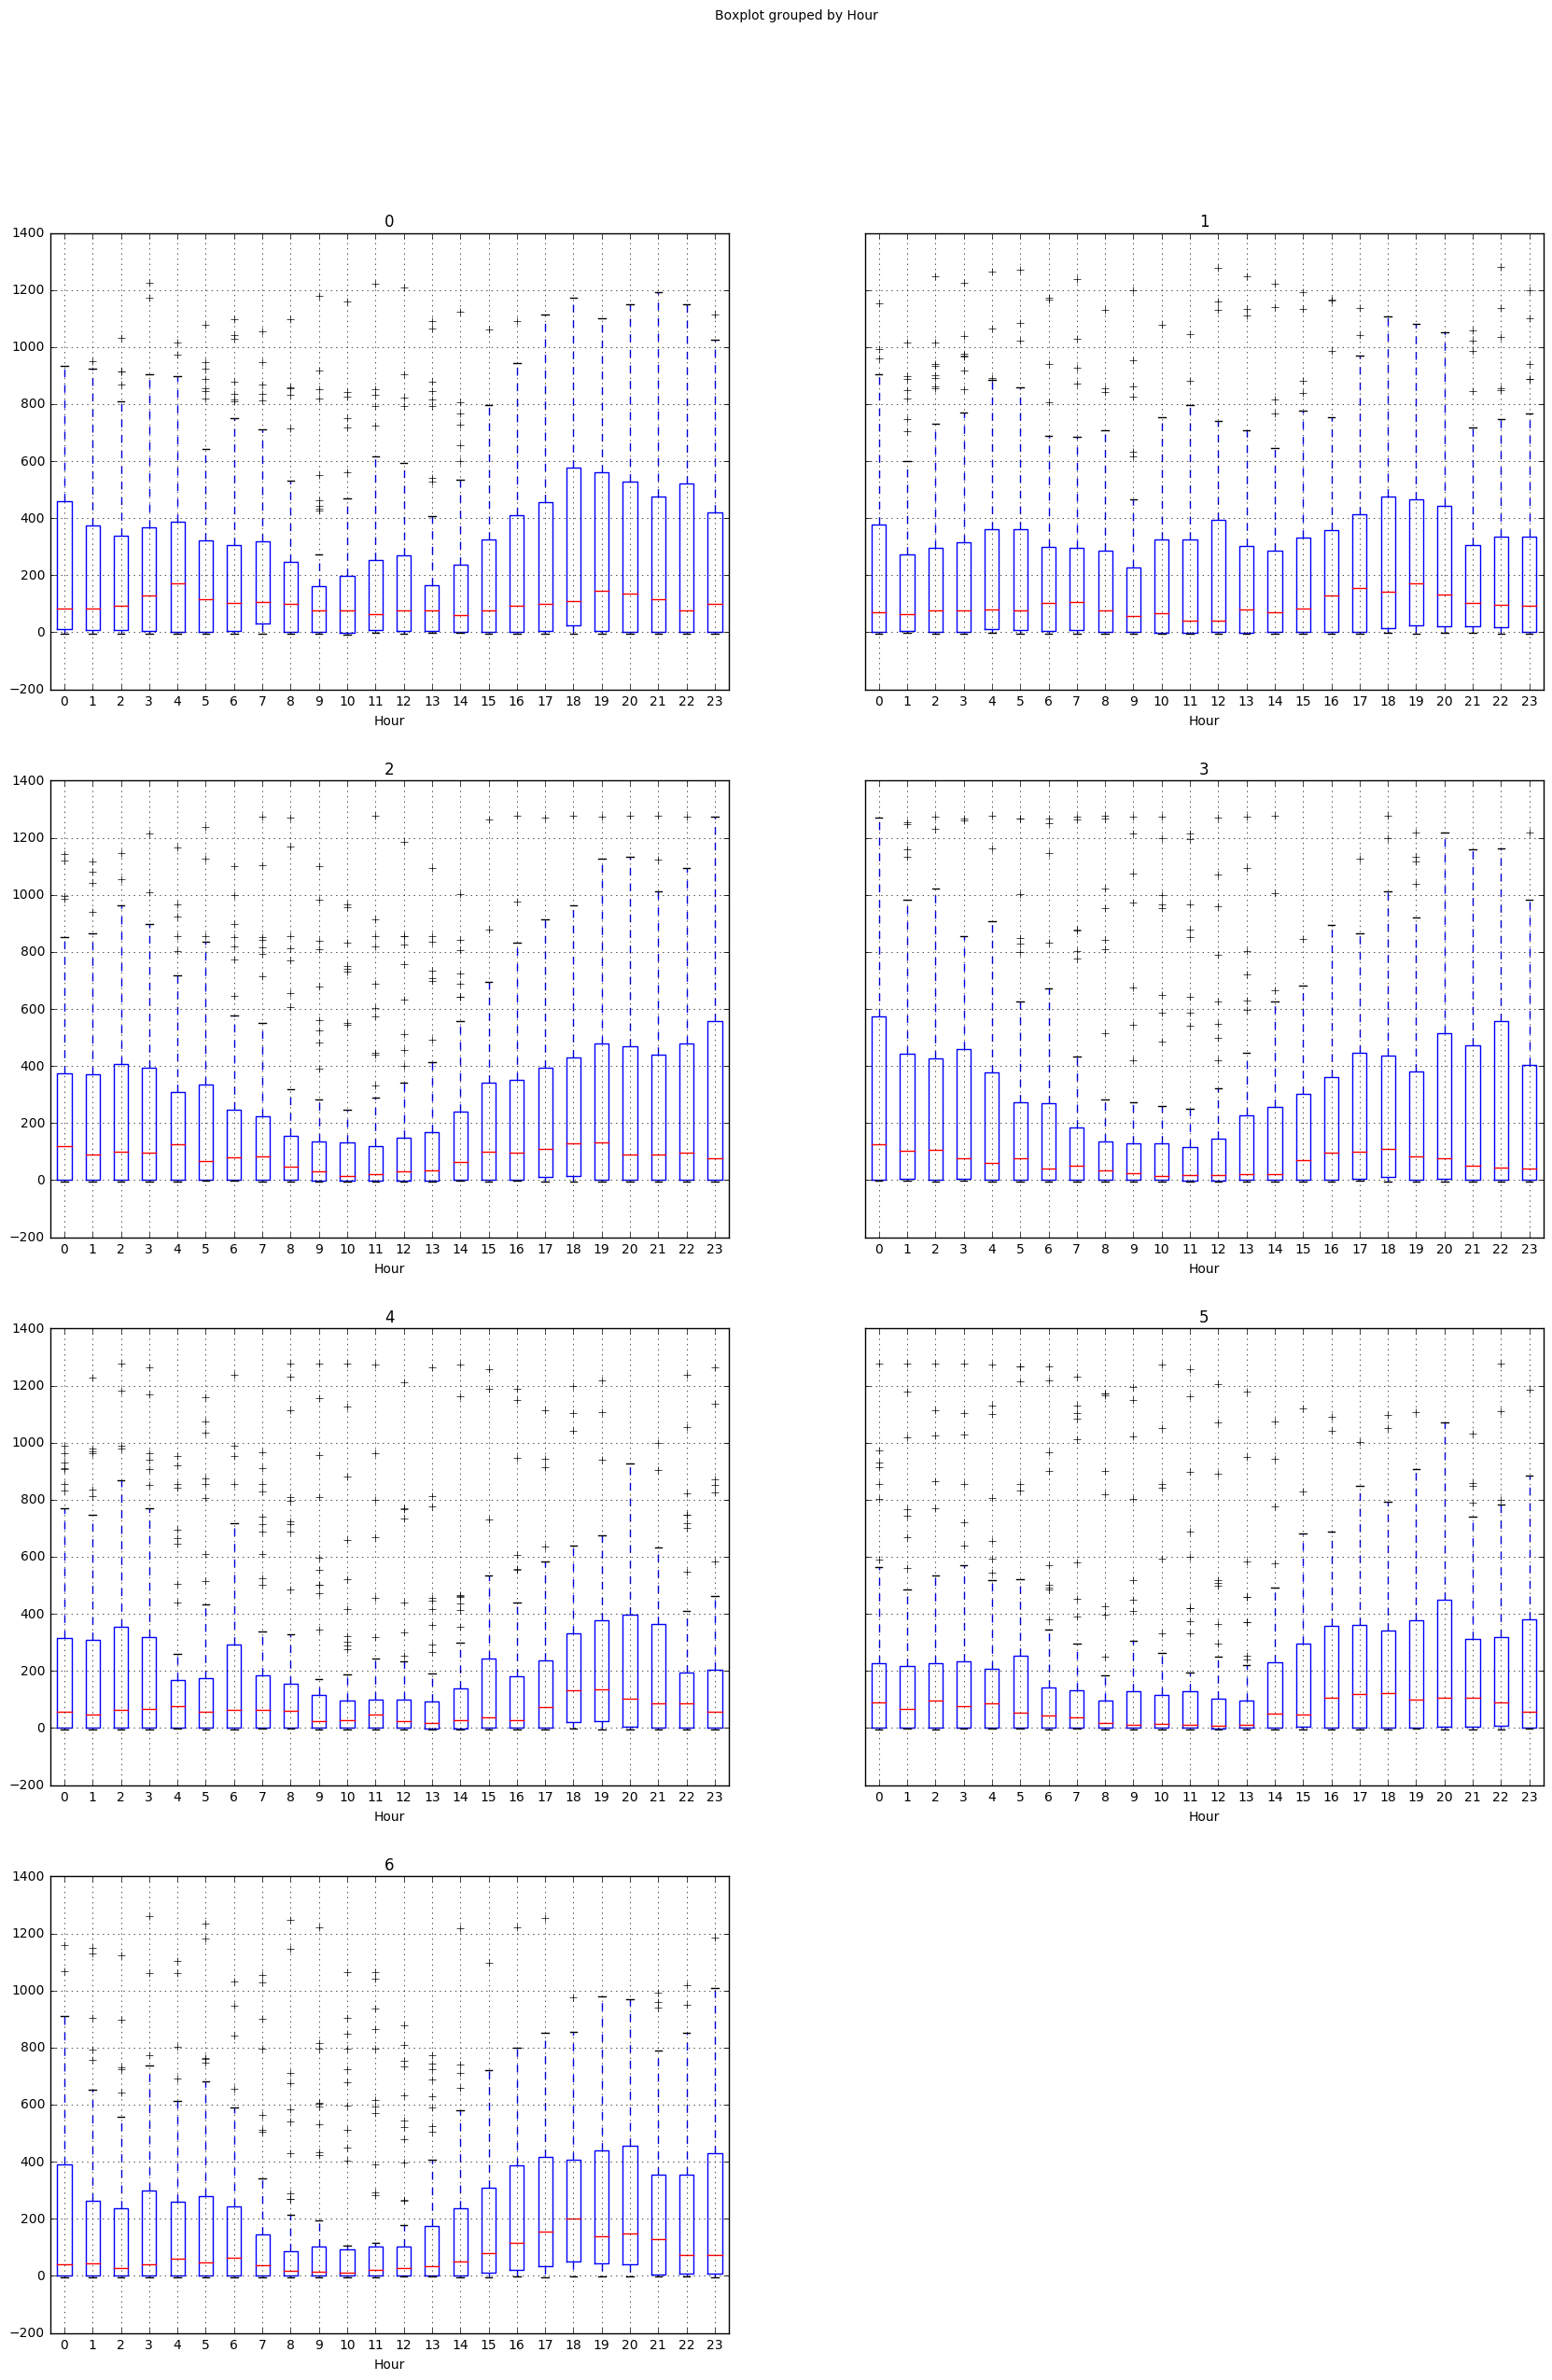

In [15]:
df.groupby('Weekday').boxplot(by="Hour",column=['Power'],figsize=(20,30),layout=(4,2))

<Container object of 3 artists>

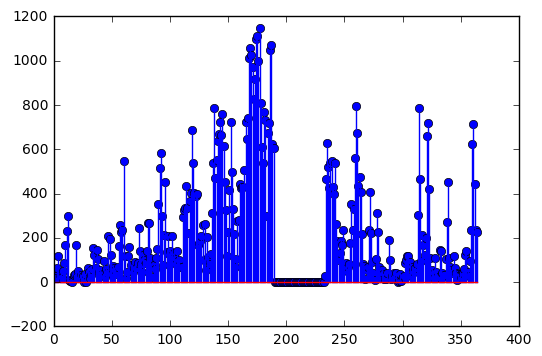

In [16]:
plt.stem(df.groupby(df['DayOfYear'])['Power'].mean())

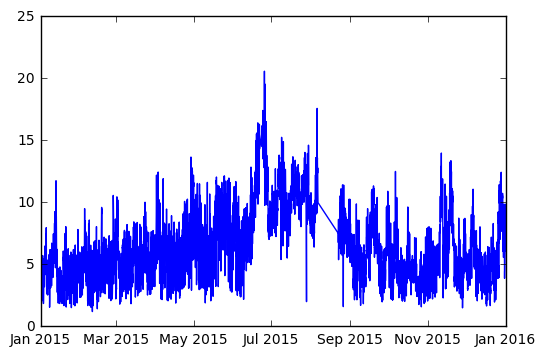

In [17]:
plt.plot(df['Speed'])

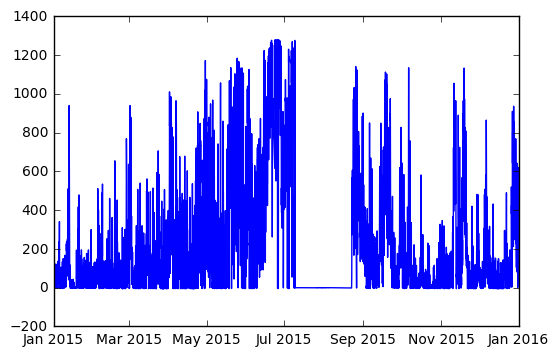

In [18]:
plt.plot(df['Power'])

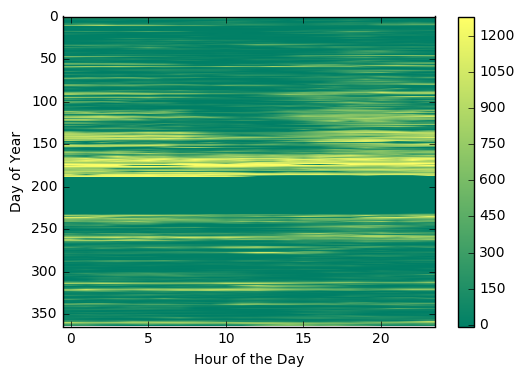

In [19]:
import matplotlib.colors as clrs
plt.imshow(loadCurves, aspect='auto',cmap='summer')
plt.ylabel('Day of Year')
plt.xlabel('Hour of the Day')
plt.colorbar()

In [20]:
X=df[['Speed','Hour']]
Y=df['Power']

In [21]:
X_mat=X.as_matrix()
Y_mat=Y.as_matrix()

In [37]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_mat,Y_mat)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [38]:
reg.score(X_mat,Y_mat)

0.94925747009726491

In [39]:
reg.predict(X_mat)

array([  55.24444444,  100.73333333,   89.8       , ...,  118.61666667,
        125.25      ,  104.2       ])

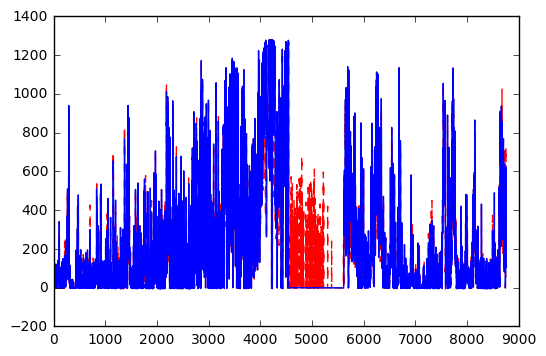

In [40]:
plt.plot(reg.predict(X_mat),'--r')
plt.plot(df['Power'].values,'-b')

In [41]:
from sklearn.cross_validation import cross_val_score
score=cross_val_score(reg,X_mat,Y_mat,cv=10)
score.mean()

-0.24563963275019166

In [42]:
['a', 'b', 'c'] + [1, 2, 3]

['a', 'b', 'c', 1, 2, 3]

In [43]:
type(lambda x: x+1)

function

In [44]:
reg.decision_path(X_mat)

<8761x13059 sparse matrix of type '<class 'numpy.int64'>'
	with 158368 stored elements in Compressed Sparse Row format>

In [45]:
reg.tree_

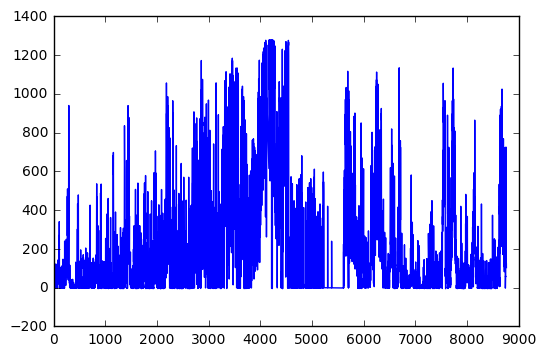

In [46]:
plt.plot(reg.predict(X_mat))

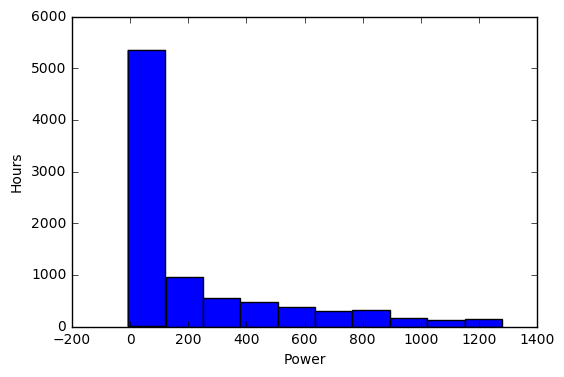

In [47]:
plt.hist(df['Power'])
plt.ylabel('Hours')
plt.xlabel('Power')

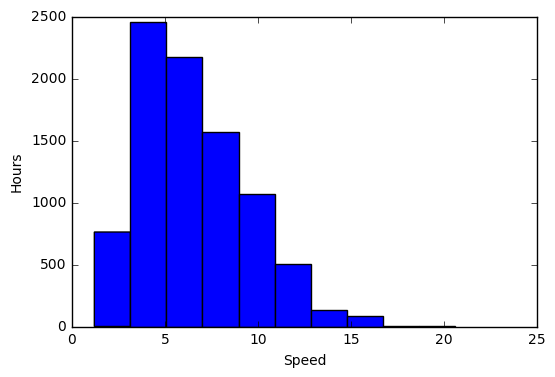

In [33]:
plt.hist(df['Speed'])
plt.ylabel('Hours')
plt.xlabel('Speed')

In [34]:
data3=data2.resample('D').mean()

In [35]:
data4=data3.groupby(data3['Weekday'])

In [36]:
data4.describe()

DayOfYear       Hour        Power      Speed
Weekday                                                     
0.0     count   52.000000  52.000000    52.000000  52.000000
        mean   183.500000  11.500000   233.683805   6.753945
        std    106.083301   0.000000   257.713406   2.449006
        min      5.000000  11.500000    -1.037489   3.300694
        25%     94.250000  11.500000    37.852083   5.009896
        50%    183.500000  11.500000   121.031597   5.997569
        75%    272.750000  11.500000   363.496493   8.241910
        max    362.000000  11.500000  1047.070139  14.795000
1.0     count   52.000000  52.000000    52.000000  52.000000
        mean   184.500000  11.500000   229.148162   6.705586
        std    106.083301   0.000000   262.656112   2.469680
        min      6.000000  11.500000    -1.133074   2.771528
        25%     95.250000  11.500000    37.218403   4.746111
        50%    184.500000  11.500000   137.151736   6.342361
        75%    273.750000  11.500000   306.263021   8.315142
        max    363.000000  11.500000  1070.048611  15.322969
2.0     count   52.000000  52.000000    52.000000  52.000000
        mean   185.500000  11.500000   224.268981   6.663840
        std    106.083301   0.000000   260.478588   2.672769
        min      7.000000  11.500000    -1.228658   3.501389
        25%     96.250000  11.500000    31.329514   4.375035
        50%    185.500000  11.500000   109.219792   5.946944
        75%    274.750000  11.500000   364.073090   8.394792
        max    364.000000  11.500000  1099.900174  15.513628
3.0     count   53.000000  53.000000    53.000000  53.000000
        mean   183.000000  11.500000   218.640013   6.530366
        std    108.104116   0.000000   275.079489   2.712983
        min      1.000000  11.500000    -1.324242   2.959028
        25%     92.000000  11.500000    30.593750   4.507639
        50%    183.000000  11.500000    82.934861   5.275694
        75%    274.000000  11.500000   331.681597   8.201944
        max    365.000000  11.500000  1110.780556  14.657639
4.0     count   53.000000  53.000000    53.000000  53.000000
        mean   177.113208  11.283019   188.278024   6.469614
        std    107.912832   1.579646   250.560489   2.512367
        min      1.000000   0.000000    -1.419827   3.264583
        25%     86.000000  11.500000    29.060417   4.770833
        50%    177.000000  11.500000    95.579167   5.558333
        75%    268.000000  11.500000   219.589583   8.578472
        max    359.000000  11.500000  1056.179028  14.384028
5.0     count   52.000000  52.000000    52.000000  52.000000
        mean   181.500000  11.500000   185.700183   6.297902
        std    106.083301   0.000000   252.969236   2.505780
        min      3.000000  11.500000    -0.846320   3.127778
        25%     92.250000  11.500000    31.910955   4.591146
        50%    181.500000  11.500000    87.185417   5.497569
        75%    270.750000  11.500000   228.888715   7.442250
        max    360.000000  11.500000  1146.219444  13.154167
6.0     count   52.000000  52.000000    52.000000  52.000000
        mean   182.500000  11.500000   197.097913   6.294987
        std    106.083301   0.000000   235.055669   2.370232
        min      4.000000  11.500000    -0.941905   3.191667
        25%     93.250000  11.500000    39.374653   4.617361
        50%    182.500000  11.500000   102.173958   5.288681
        75%    271.750000  11.500000   259.531597   7.601007
        max    361.000000  11.500000   970.440799  13.294965

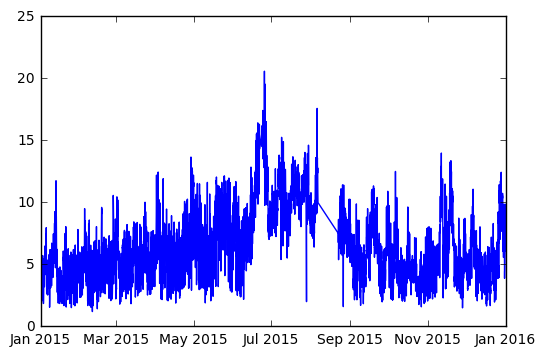

In [48]:
plt.plot(df['Speed'])

(array([ 0.        ,  3.10497711, -0.22368017, ...,  0.78767756,
        -0.43488063, -2.54113816]),
 array([  0.00000000e+00,   2.28284442e-04,   4.56568885e-04, ...,
          9.99429289e-01,   9.99657573e-01,   9.99885858e-01]),
 <matplotlib.lines.Line2D at 0x120f84a58>)

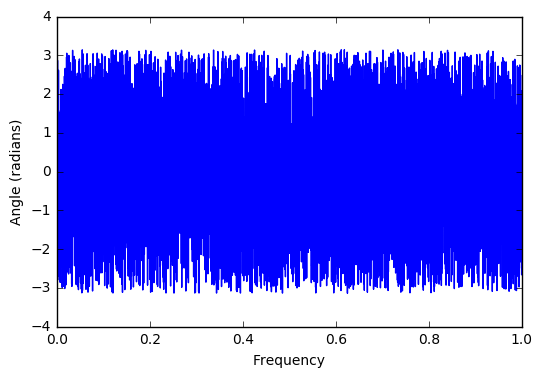

In [54]:
plt.angle_spectrum(df['Speed'])

,Speed,Power,DayOfYear,Weekday,Hour
Local time,,,,,
2015-01-01 00:00:00,4.900000,65.700000,1,3,0
2015-01-01 01:00:00,5.516667,112.566667,1,3,1
2015-01-01 02:00:00,5.333333,89.800000,1,3,2
2015-01-01 03:00:00,3.366667,17.833333,1,3,3
2015-01-01 04:00:00,3.100000,-1.316667,1,3,4
2015-01-01 05:00:00,3.566667,11.266667,1,3,5
2015-01-01 06:00:00,2.766667,0.000000,1,3,6
2015-01-01 07:00:00,2.150000,0.000000,1,3,7
2015-01-01 08:00:00,2.083333,0.000000,1,3,8
